# Mesh 3

Menys slope que la mesh1

Density function in `refinter.f90`

    real (r8) function densf(x) result(dens_f)
        real (r8), dimension(1:2), intent(in) :: x
        real (r8), dimension(1:3) :: p
        real (r8) :: lat
        real (r8) :: lon
        real (r8) :: latc
        real (r8) :: lonc
        real (r8) :: radiuse
        real (r8) :: slope
        real (r8) :: epsilons
        real (r8) :: dists
        real (r8) :: maxdist
        real (r8) :: sx

        !Density function parameters
        ! (increase_of_resolution) / (distance)
        slope = 10._r8/600._r8
        ! radius (in km) of high resolution area
        maxdist = 50._r8
        ! distance (in km) of transition zone belt: ratio / slope
        epsilons = 150._r8/slope
        if(epsilons > 10000._r8)then
            epsilons = 10000._r8
        end if

        ! x is the input; the function is called like densf([lat, lon])
        lat = x(1)
        lon = x(2)

        !Center of refined region is 0,-8.4559 in radians (center of pentagon)
        ! TODO cannot do latc=-8.4559
        latc=0._r8
        lonc=0._r8
        !Distance to center ()
        radiuse = 6367._r8
        dists = radiuse * 2 * dasin(dsqrt(dsin((latc - lat) / 2._r8)**2 + dcos(lat) * dcos(latc) * dsin ((lonc-lon) / 2._r8)**2))

        !Distance to center metric
        sx=(dists-maxdist)*slope

        !Set density
        if(dists<=maxdist)then
            !Point close to the center
            dens_f=1.0
        elseif((dists<=maxdist+epsilons) .and. (dists>maxdist))then
            !Point in the transition
            dens_f=1.0 + sx
        else
            !Point far from the center
            dens_f=1.0 + epsilons*slope
        end if

        !Normalization - Make it in [0,1]
        dens_f = 1.0 / dens_f**2
    end function densf


In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_test = 'mesh3'

args_mesh = {'mesh3': {
    'slope': 10./600,
    'gammas': 150.,
    'maxdist': 50.,
    'maxepsilons': 10000.
}}

/home/marta/anaconda3/envs/Dades/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


Needed cells for lower resolution 1km
177954.31535148484
Number smaller than 15km
47679


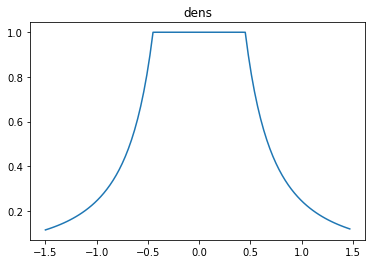

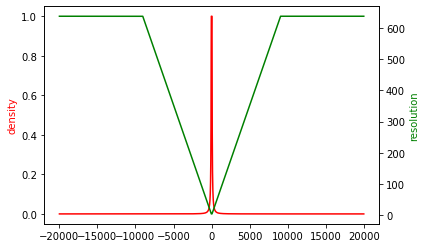

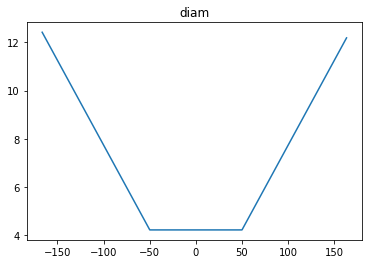

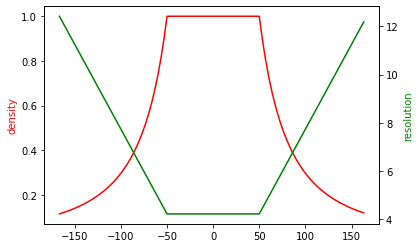

In [2]:
from meshes_funcs import dens2res
res = dens2res(10000, step=0.03, **args_mesh[name_test])

LEVEL 3 MESH
MPAS GRID NOT AVAILABLE
Plot iModel


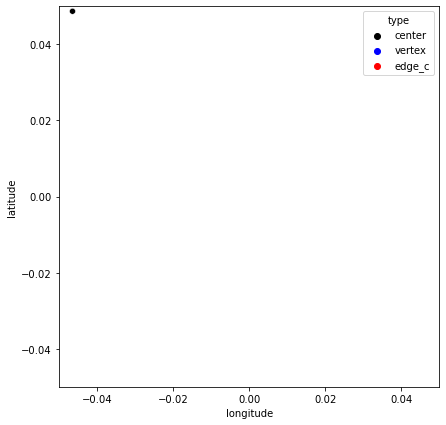

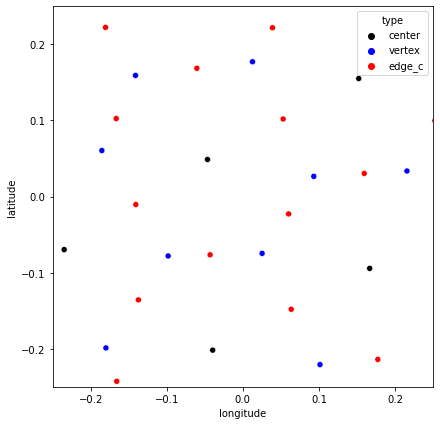

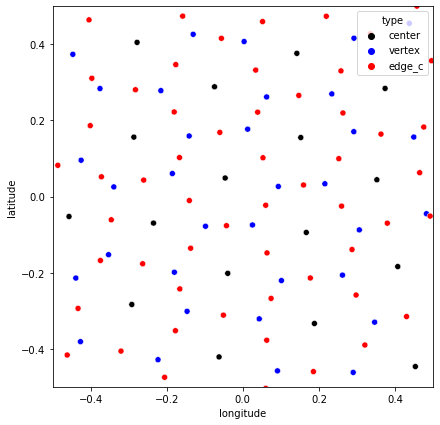

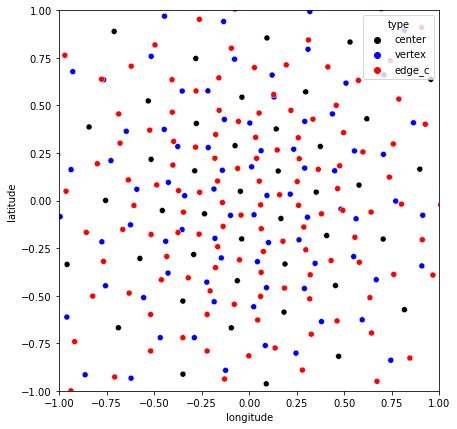

LEVEL 4 MESH
Reading MPAS mesh and loading lats&lons
center
Keyword: Cell
           latCell      lonCell     latitude    longitude
count  2562.000000  2562.000000  2562.000000  2562.000000
mean      0.000964    -0.003923     0.055215    -0.224749
std       0.474407     1.122012    27.181523    64.286575
min      -1.519566    -3.140502   -87.064734  -179.937530
25%      -0.193557    -0.273486   -11.090023   -15.669571
50%      -0.000366    -0.000500    -0.020946    -0.028632
75%       0.196134     0.269920    11.237662    15.465257
max       1.553619     3.139158    89.015803   179.860495
vertex
Keyword: Vertex
         latVertex    lonVertex     latitude    longitude
count  5120.000000  5120.000000  5120.000000  5120.000000
mean      0.000941    -0.000263     0.053908    -0.015044
std       0.474591     1.121878    27.192060    64.278883
min      -1.548470    -3.135365   -88.720821  -179.643210
25%      -0.197890    -0.273198   -11.338246   -15.653120
50%       0.000207    -0.000032  

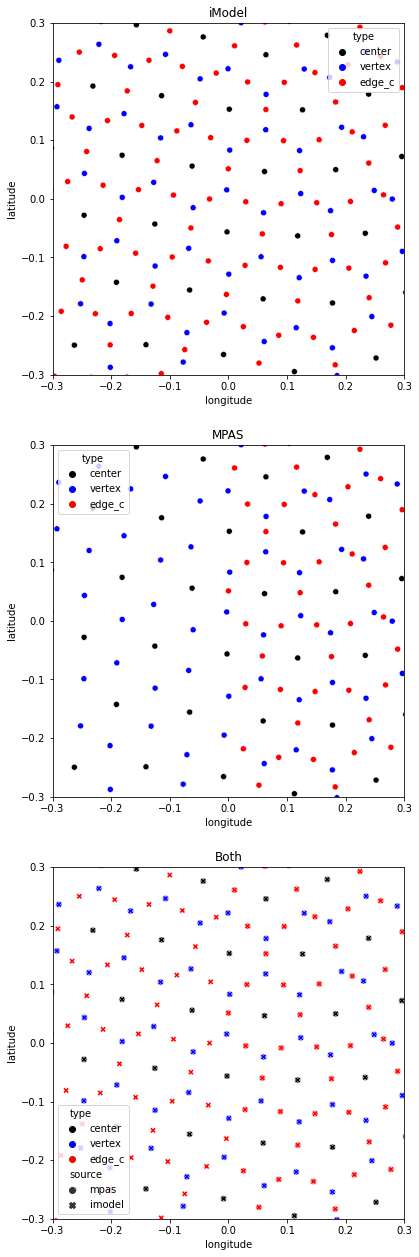

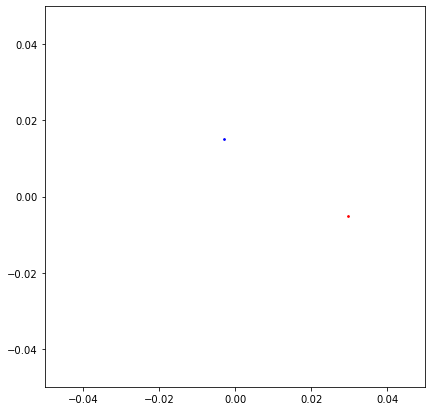

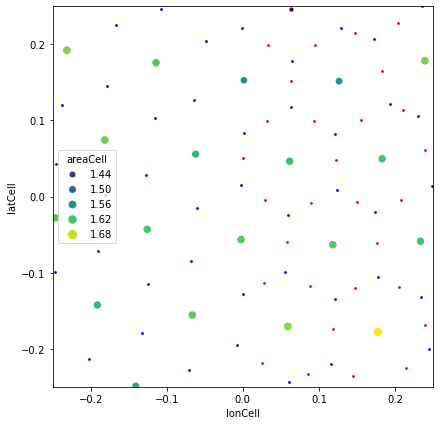

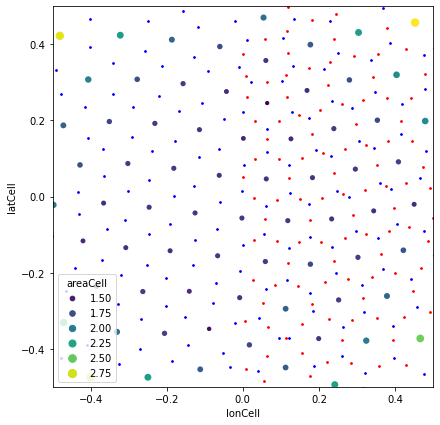

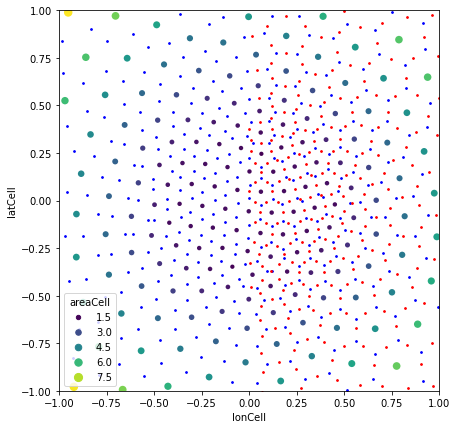

Rescale area to the Earth Sphere


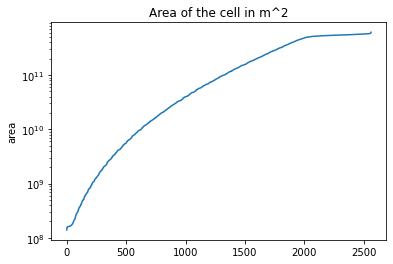

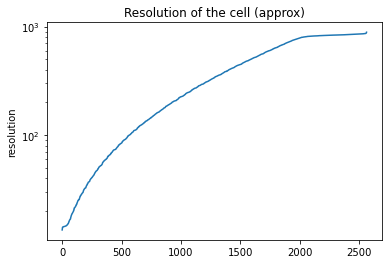

Number smaller than 15km: 
46.0
Resolution of the cell (approx)


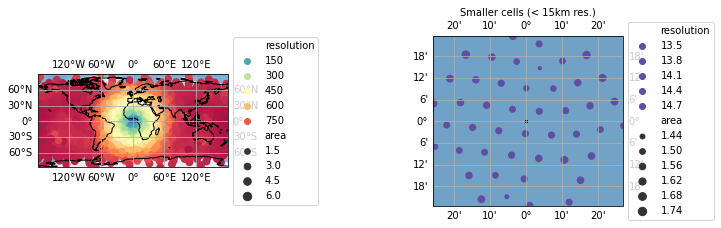

Different Radius


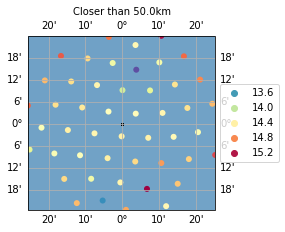

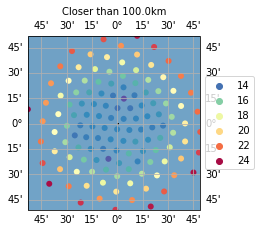

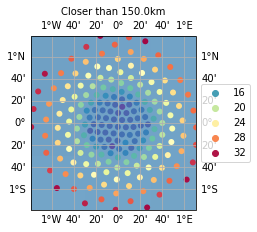

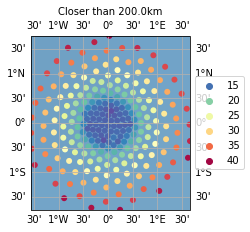

Different highest resolution
No cells with resolution lower than 3.0km
No cells with resolution lower than 5.0km
No cells with resolution lower than 10.0km


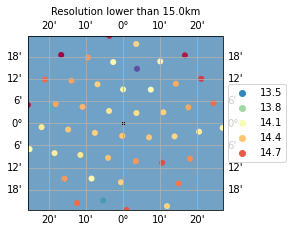

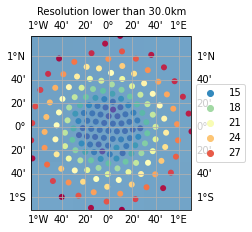

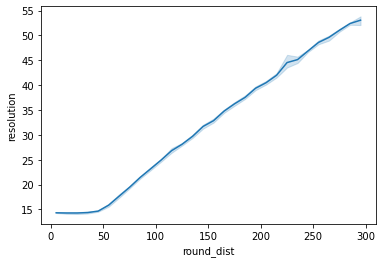

LEVEL 5 MESH
Reading MPAS mesh and loading lats&lons
center
Keyword: Cell
            latCell       lonCell      latitude     longitude
count  10242.000000  10242.000000  10242.000000  10242.000000
mean      -0.000156     -0.001581     -0.008917     -0.090612
std        0.471211      1.116124     26.998378     63.949168
min       -1.556228     -3.139883    -89.165316   -179.902021
25%       -0.196861     -0.271930    -11.279287    -15.580432
50%       -0.000223     -0.000116     -0.012789     -0.006627
75%        0.199126      0.271541     11.409093     15.558147
max        1.546708      3.140289     88.619859    179.925312
vertex
Keyword: Vertex
          latVertex     lonVertex      latitude     longitude
count  20480.000000  20480.000000  20480.000000  20480.000000
mean      -0.000154     -0.000841     -0.008825     -0.048159
std        0.471281      1.116113     27.002439     63.948572
min       -1.544799     -3.141254    -88.510480   -179.980575
25%       -0.198203     -0.272566  

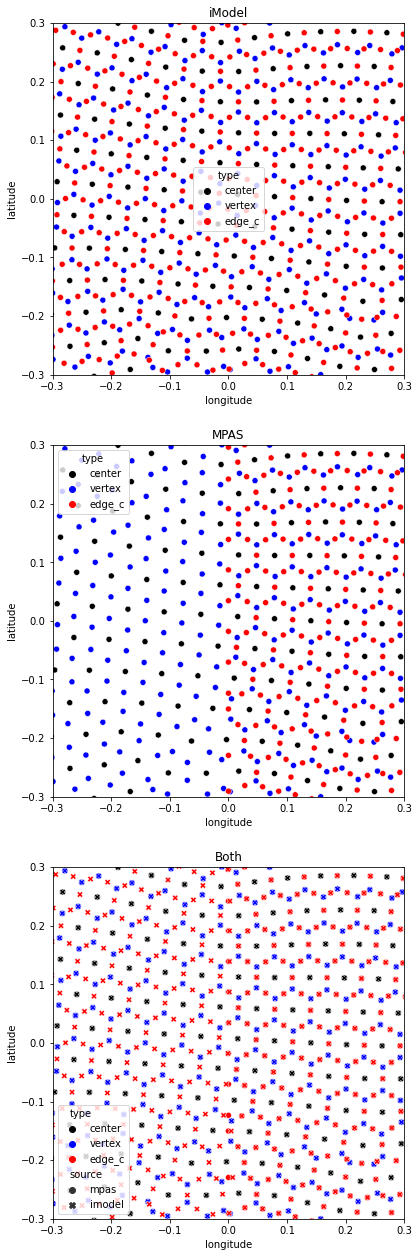

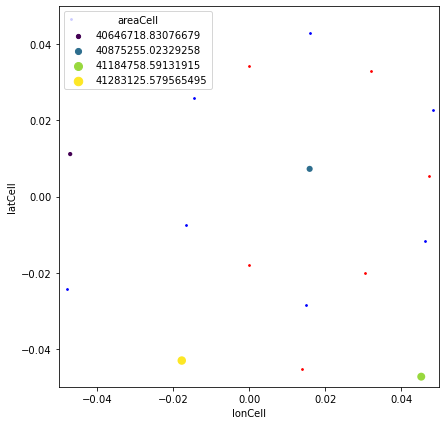

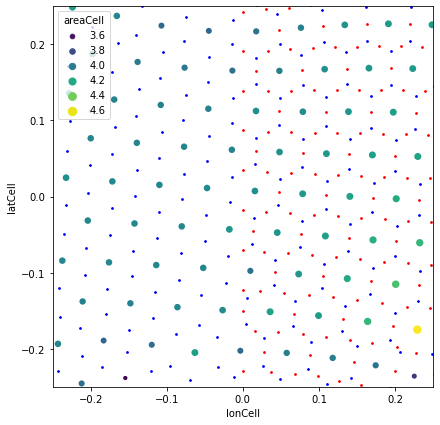

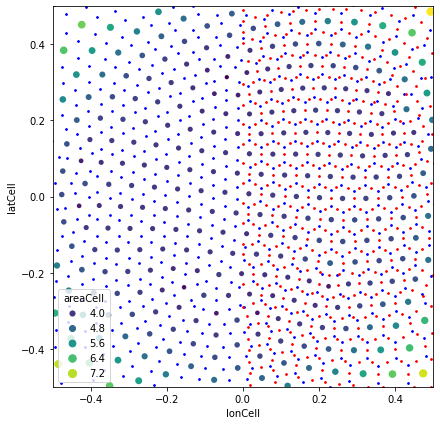

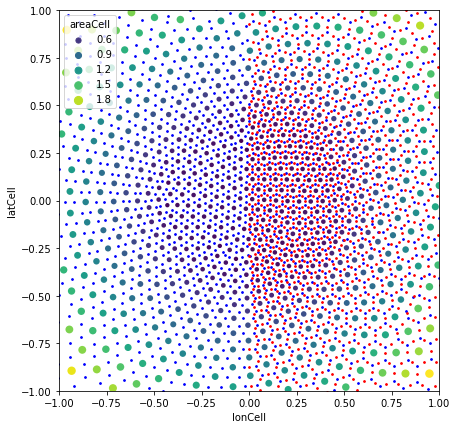

Rescale area to the Earth Sphere


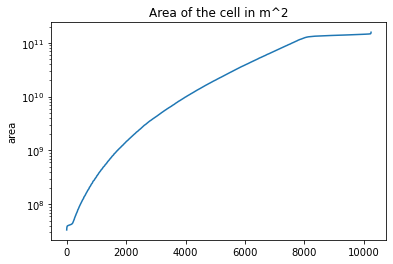

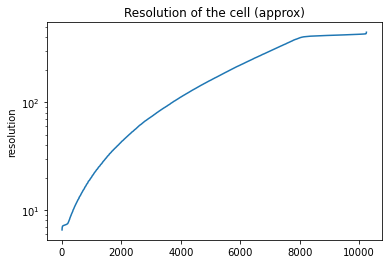

Number smaller than 15km: 
698.0
Resolution of the cell (approx)


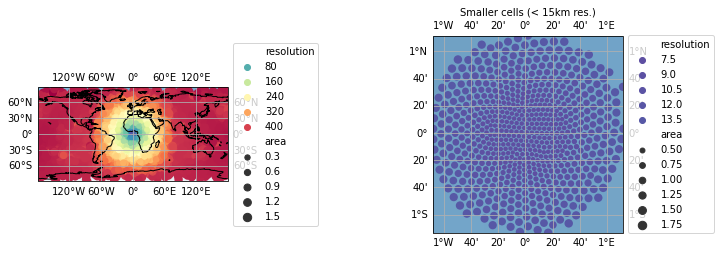

Different Radius


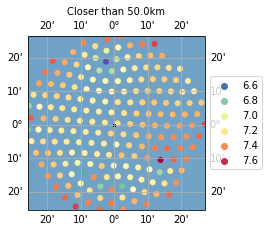

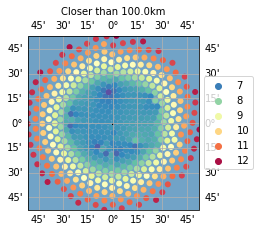

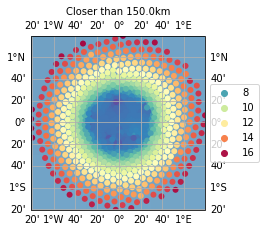

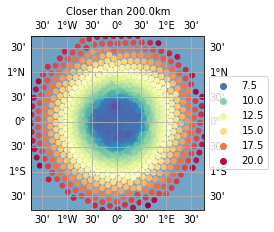

Different highest resolution
No cells with resolution lower than 3.0km
No cells with resolution lower than 5.0km


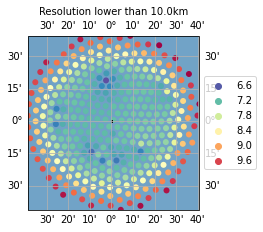

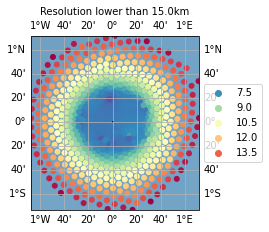

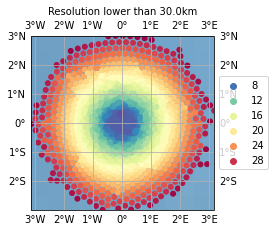

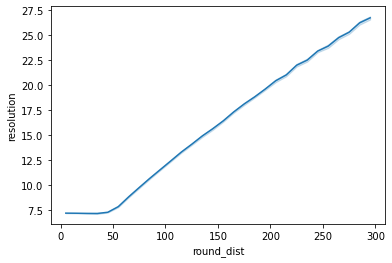

LEVEL 6 MESH
MPAS GRID NOT AVAILABLE
Plot iModel


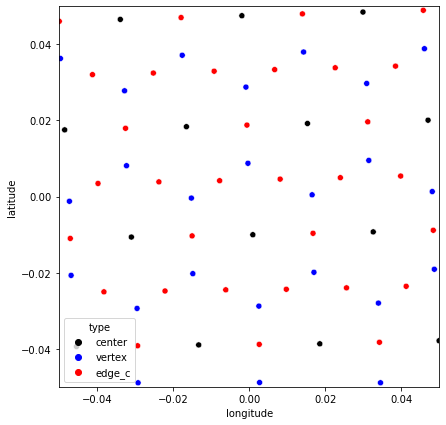

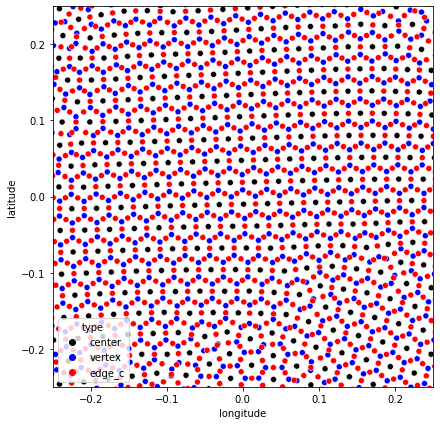

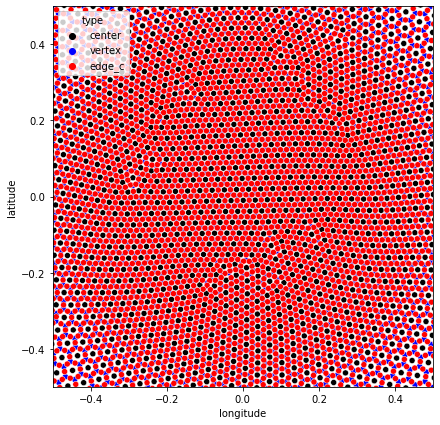

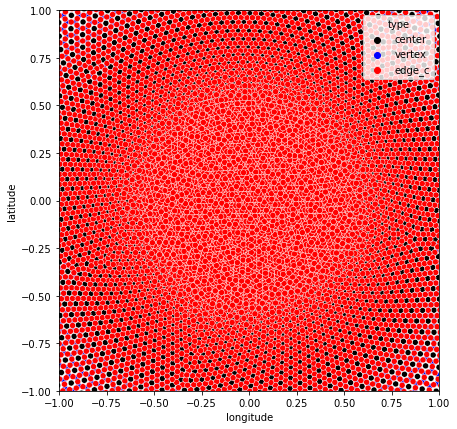

In [3]:
from meshes_funcs import study_mesh, center_hex_tr, \
    mpas_center_hex_tr, compare_imodel_mpas
import glob
import os

imodel_meshes = name_test + '/grids/'
files = sorted(glob.glob(name_test + '/meshes/*_grid.nc'))

lims = [0.05, 0.25, 0.5, 1]
for lev in ['3', '4', '5', '6']:

    print('LEVEL ' + lev + ' MESH')
    file = name_test + '/meshes/' + name_test + '-lev' + lev + '_grid.nc'
    if not os.path.exists(file):
        print('MPAS GRID NOT AVAILABLE')

        print('Plot iModel')
        for lim in lims:
            center_hex_tr(folder=imodel_meshes,
                          name='icos_ref_scvt_h1_' + lev,
                          lim=lim)
        continue

    compare_imodel_mpas(file,
                        imodel_meshes,
                        'icos_ref_scvt_h1_' + lev,
                        lim=0.3)

    for lim in lims:
        mpas_center_hex_tr(file, lim=lim)

    study_mesh(file)
